In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv
/kaggle/input/netflix-subscription-price-in-different-countries/netflix price in different countries.csv


**Data Cleaning and Processing**

In [2]:
# We first insert the dataset from Kaggle
netflix_df = pd.read_csv('../input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv')
netflix_df.head(10)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54
7,ca,Canada,6239,4311,1928,7.91,11.87,15.03
8,cl,Chile,4994,3156,1838,7.07,9.91,12.74
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93


In [3]:
netflix_df.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [4]:
netflix_df.shape

(65, 8)

In [5]:
netflix_df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [6]:
# Now we are going to check if there is any null value in the dataset
netflix_df.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

Great! There is not null value in our dataset. So we don't need to do anything to the data to fill out the NaN.

In [7]:
netflix_df.Country.value_counts()

Argentina        1
Liechtenstein    1
Malaysia         1
Mexico           1
Moldova          1
                ..
Indonesia        1
Ireland          1
Israel           1
Italy            1
Venezuela        1
Name: Country, Length: 65, dtype: int64

**Visiualization**

In [8]:
fig_b = px.bar(netflix_df, x='Country', y='Cost Per Month - Basic ($)', color = "Cost Per Month - Basic ($)")
fig_b.show()

In [9]:
fig_s = px.bar(netflix_df, x='Country', y='Cost Per Month - Standard ($)', color = "Cost Per Month - Standard ($)")
fig_s.show()

In [10]:
fig_p = px.area(netflix_df, x='Country', y='Cost Per Month - Premium ($)', color = "Cost Per Month - Premium ($)")
fig_p.show()

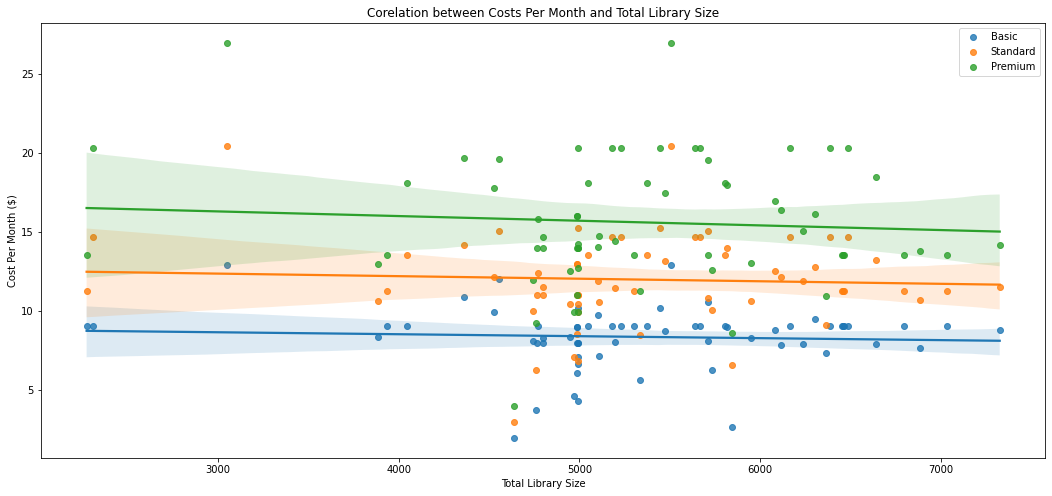

In [11]:
# Now we want to see if there is a co-relationship between 'Total Library Size' and 'Cost Per Month'
plt.figure(figsize=(18,8))
sns.regplot(x=netflix_df['Total Library Size'], y=netflix_df["Cost Per Month - Basic ($)"], label = "Basic")
sns.regplot(x=netflix_df['Total Library Size'], y=netflix_df["Cost Per Month - Standard ($)"], label = "Standard")
sns.regplot(x=netflix_df['Total Library Size'], y=netflix_df["Cost Per Month - Premium ($)"], label = "Premium")
plt.title("Corelation between Costs Per Month and Total Library Size")
plt.xlabel("Total Library Size")
plt.ylabel("Cost Per Month ($)")
plt.legend()

From the above chart and its regression line, we cannot see a strong co-relation between the price and the total library size. Thus, it does not mean that a higher price would have a larger library size.

Next, we want to explore the data from multiple questions.

1. Which countries have the most expensive or cheapest costs?

In [12]:
netflix_df.sort_values(by = "Cost Per Month - Basic ($)", ascending=False)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
56,ch,Switzerland,5506,3654,1852,12.88,20.46,26.96
13,dk,Denmark,4558,2978,1580,12.00,15.04,19.60
55,se,Sweden,4361,2973,1388,10.90,14.20,19.70
29,il,Israel,5713,3650,2063,10.56,15.05,19.54
...,...,...,...,...,...,...,...,...
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
26,in,India,5843,3718,2125,2.64,6.61,8.60


In [13]:
netflix_df.sort_values(by = "Cost Per Month - Standard ($)", ascending=False)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
56,ch,Switzerland,5506,3654,1852,12.88,20.46,26.96
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
17,fr,France,5445,3604,1841,10.16,15.24,20.32
29,il,Israel,5713,3650,2063,10.56,15.05,19.54
...,...,...,...,...,...,...,...,...
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93
26,in,India,5843,3718,2125,2.64,6.61,8.60
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26


In [14]:
netflix_df.sort_values(by = "Cost Per Month - Premium ($)", ascending=False)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
56,ch,Switzerland,5506,3654,1852,12.88,20.46,26.96
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96
18,de,Germany,5668,3814,1854,9.03,14.67,20.32
30,it,Italy,5183,3545,1638,9.03,14.67,20.32
28,ie,Ireland,6486,4515,1971,9.03,14.67,20.32
...,...,...,...,...,...,...,...,...
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
26,in,India,5843,3718,2125,2.64,6.61,8.60


We can see that among costs for Basic, Standard and Premium, both Switzerland and Liechtenstein have the most expensive subscription fees, but the total library size of Switzerland is much higher than that of Liechtenstein, more than 2000. While Turkey has the lowest subscription fees, but larger library size than that of Liechtenstein.

2. Is there any variables that affect the subscription fees?
In the visualization part, we have seen that there is no correlation between the total librazy size and the fees. But let's confirm this one more time.

,Total Library Size,Cost Per Month - Basic ($),No. of TV Shows,No. of Movies
Total Library Size,1.000000,-0.062877,0.971146,0.849957
Cost Per Month - Basic ($),-0.062877,1.000000,-0.003814,-0.179913
No. of TV Shows,0.971146,-0.003814,1.000000,0.699786
No. of Movies,0.849957,-0.179913,0.699786,1.000000


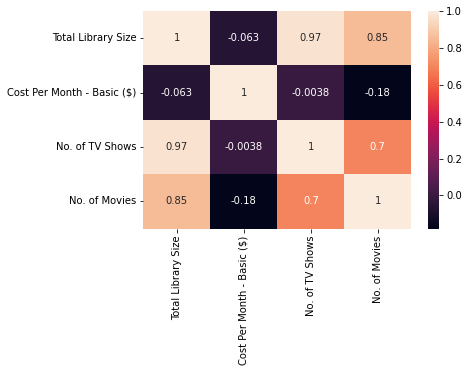

In [15]:
data = netflix_df[["Total Library Size", "Cost Per Month - Basic ($)", "No. of TV Shows", "No. of Movies"]]
corr = data.corr()
sns.heatmap(corr, annot = True)
corr.style.background_gradient(cmap = "Blues")

,Total Library Size,Cost Per Month - Standard ($),No. of TV Shows,No. of Movies
Total Library Size,1.000000,-0.055200,0.971146,0.849957
Cost Per Month - Standard ($),-0.055200,1.000000,0.002285,-0.170391
No. of TV Shows,0.971146,0.002285,1.000000,0.699786
No. of Movies,0.849957,-0.170391,0.699786,1.000000


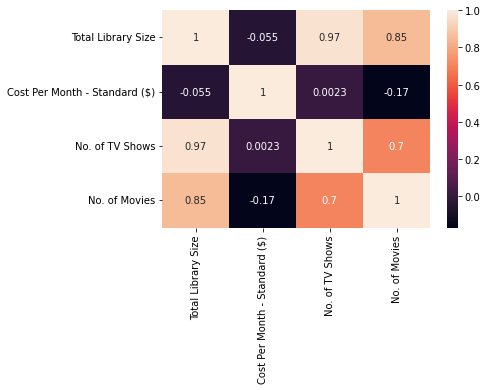

In [16]:
data = netflix_df[["Total Library Size", "Cost Per Month - Standard ($)", "No. of TV Shows", "No. of Movies"]]
corr = data.corr()
sns.heatmap(corr, annot = True)
corr.style.background_gradient(cmap = "Blues")

,Total Library Size,Cost Per Month - Premium ($),No. of TV Shows,No. of Movies
Total Library Size,1.000000,-0.071521,0.971146,0.849957
Cost Per Month - Premium ($),-0.071521,1.000000,-0.011100,-0.189711
No. of TV Shows,0.971146,-0.011100,1.000000,0.699786
No. of Movies,0.849957,-0.189711,0.699786,1.000000


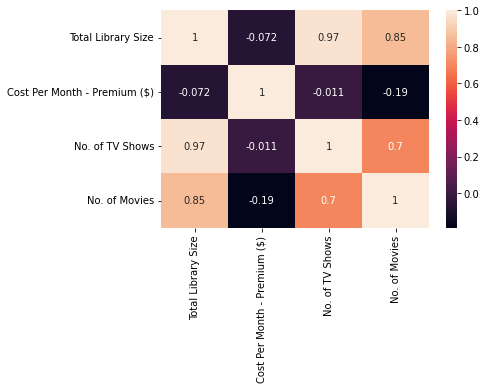

In [17]:
data = netflix_df[["Total Library Size", "Cost Per Month - Premium ($)", "No. of TV Shows", "No. of Movies"]]
corr = data.corr()
sns.heatmap(corr, annot = True)
corr.style.background_gradient(cmap = "Blues")

We know that correlation is a statistical measure ranging from +1.0 to -1.0. And if it is 0, there is no corelation between the two variables. We now see that the corelations between the cost and the library size are approximately 0, so there is no obvious corelation between them.

3. What is the distribution of this dataset?

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Distribution of Total Library Size Column'}, xlabel='Total Library Size', ylabel='Density'>

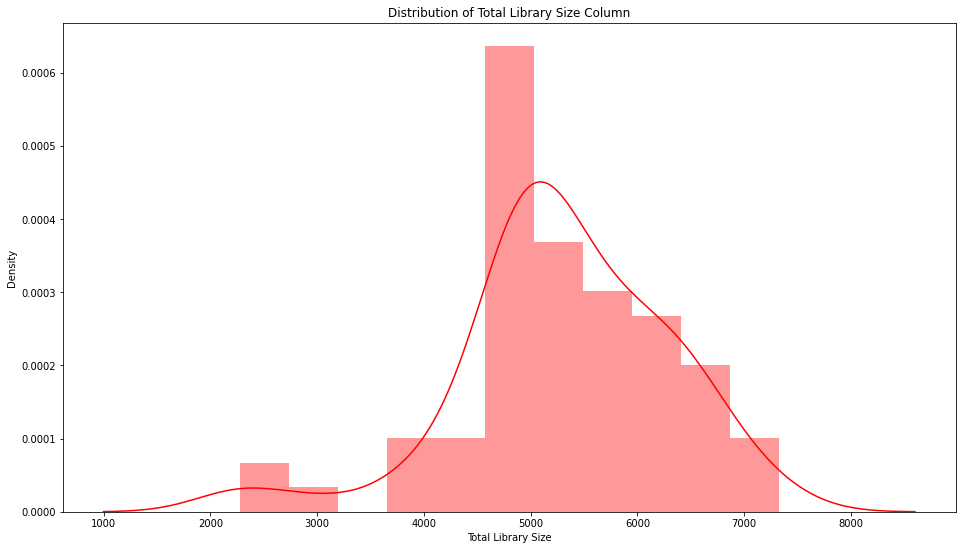

In [18]:
plt.figure(figsize = (16,9))
plt.title("Distribution of Total Library Size Column")
sns.distplot(netflix_df["Total Library Size"], color = "red", kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



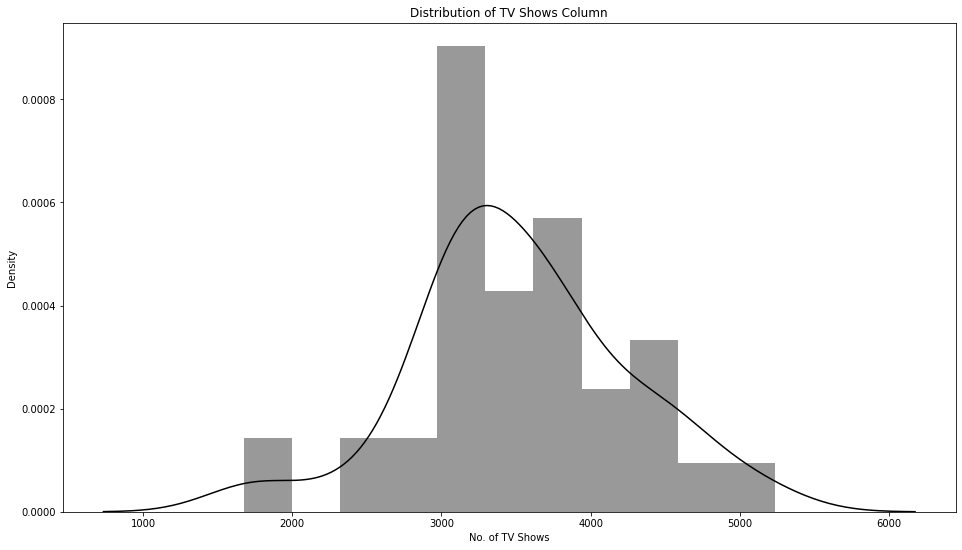

In [19]:
plt.figure(figsize = (16,9))
plt.title("Distribution of TV Shows Column")
sns.distplot(netflix_df["No. of TV Shows"], color = "black", kde = True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



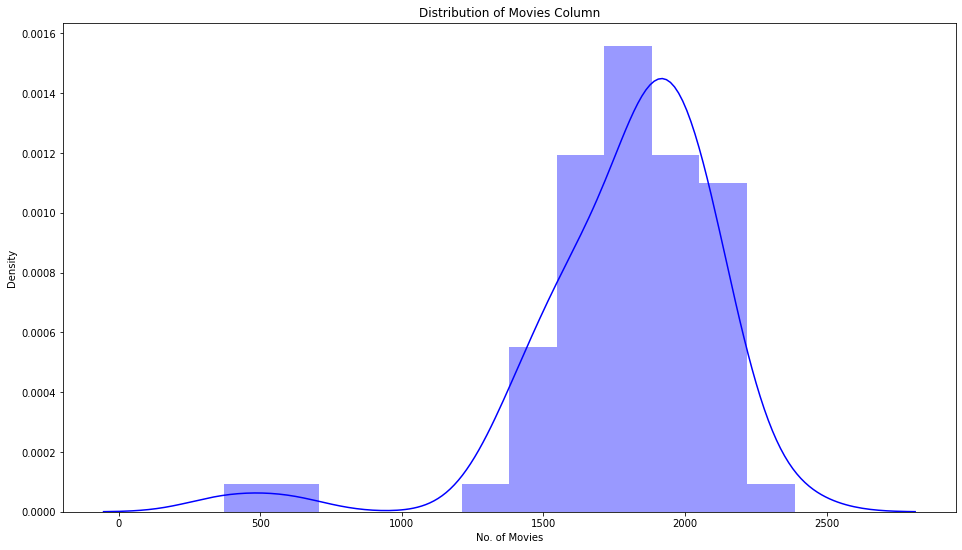

In [20]:
plt.figure(figsize = (16,9))
plt.title("Distribution of Movies Column")
sns.distplot(netflix_df["No. of Movies"], color = "blue", kde = True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



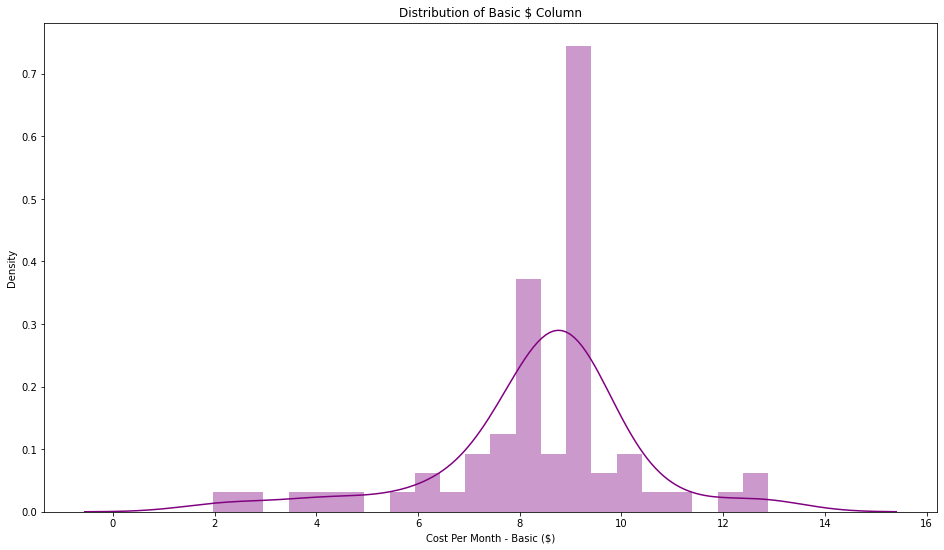

In [21]:
plt.figure(figsize = (16,9))
plt.title("Distribution of Basic $ Column")
sns.distplot(netflix_df["Cost Per Month - Basic ($)"], color = "purple", kde = True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



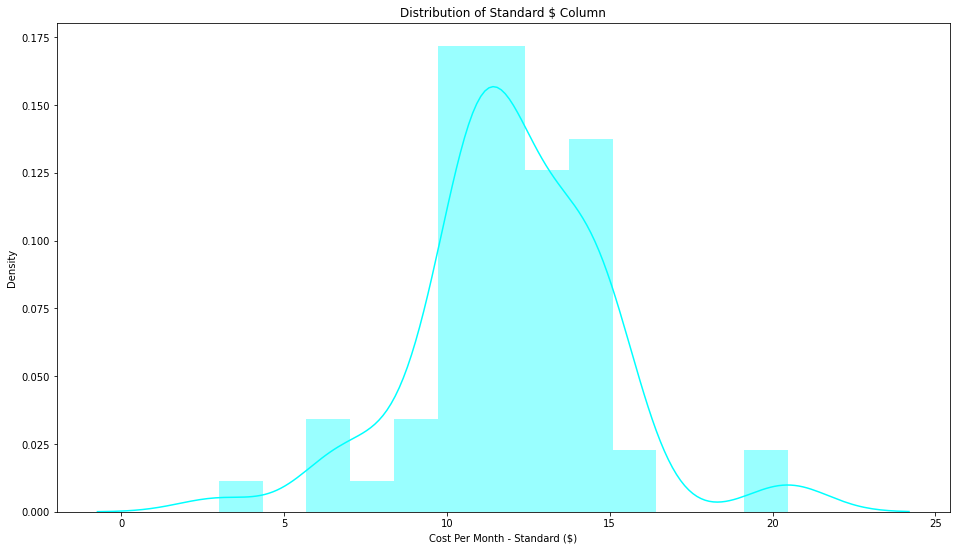

In [22]:
plt.figure(figsize = (16,9))
plt.title("Distribution of Standard $ Column")
sns.distplot(netflix_df["Cost Per Month - Standard ($)"], color = "aqua", kde = True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



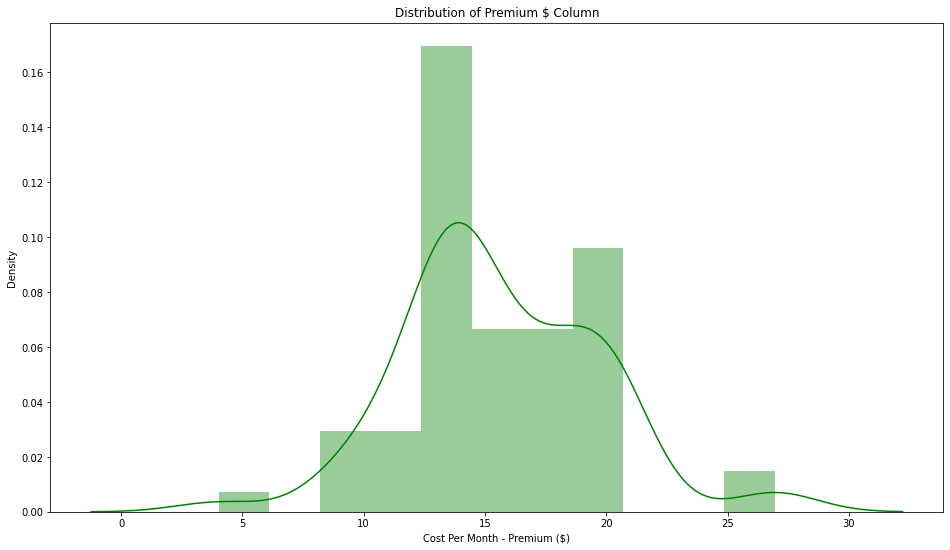

In [23]:
plt.figure(figsize = (16,9))
plt.title("Distribution of Premium $ Column")
sns.distplot(netflix_df["Cost Per Month - Premium ($)"], color = "green", kde = True)
plt.show()